In [1]:
import numpy as np
from testbed import TestBed
from epsilon_greedy import EpsilonGreedy
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


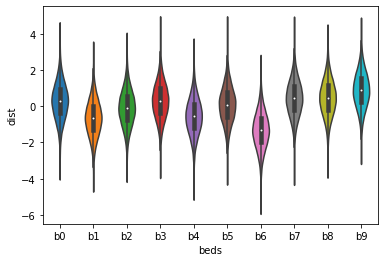

In [8]:
testbed10 = TestBed(10, 1993)
dist = [testbed10.get_dist(i, size=50000) for i in range(10)]
beds = [np.full_like(dist[i], f"b{i}", dtype=object) for i in range(10)]
df = pd.DataFrame({"beds": np.concatenate(beds), "dist": np.concatenate(dist)})
sns.violinplot(x=df["beds"], y=df["dist"], width=0.5, saturation=0.9)
plt.savefig("violin-plot.svg")

In [2]:
def do_single_run(num_bandits, steps, epsilon, alpha, seed1, seed2):
    testbed = TestBed(num_bandits, seed1)
    epg = EpsilonGreedy(epsilon, testbed, alpha, seed2)
    return epg.run(steps)


def avg_runs(num_bandits, num_runs, steps, epsilon, alpha, seed, workers=1):
    rng = np.random.default_rng(seed)
    rewards = Parallel(n_jobs=workers)(
        delayed(do_single_run)(
            num_bandits, steps, epsilon, alpha, rng.integers(10000), rng.integers(10000)
        )
        for _ in range(num_runs)
    )
    return np.mean(np.array(rewards), axis=0)


In [3]:
rewards_epsi_0_1 = avg_runs(
    num_bandits=10,
    num_runs=2000,
    steps=1000,
    epsilon=0.1,
    alpha=None,
    seed=1993,
    workers=11,
)
rewards_epsi_0_01 = avg_runs(
    num_bandits=10,
    num_runs=2000,
    steps=1000,
    epsilon=0.01,
    alpha=None,
    seed=1993,
    workers=11,
)
rewards_epsi_0 = avg_runs(
    num_bandits=10,
    num_runs=2000,
    steps=1000,
    epsilon=0,
    alpha=None,
    seed=1993,
    workers=11,
)


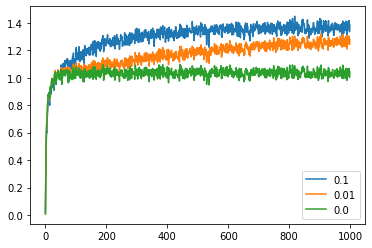

In [4]:
plt.plot(rewards_epsi_0_1, label = "0.1")
plt.plot(rewards_epsi_0_01, label = "0.01")
plt.plot(rewards_epsi_0, label = "0.0")
plt.legend()
plt.show()